# 1. BUSINESS UNDERSTANDING

With the rapid development of Artificial Intelligence (AI) in recent years, AI has been used in a variety of industries. Such as data mining, manufacturing, and financial services. By building the right models, humans can use AI to perform many tasks that once required complex human intervention. One of the most notable applications is the use of AI in healthcare.

Pneumonia is a serious lung infection that can affect people of all ages, but it is especially dangerous for the elderly, young children, and those with weakened immune systems. The traditional method for diagnosing pneumonia is through a physical examination and laboratory tests, but these methods are time-consuming and frequently require multiple visits to the doctor. This project aims to solve this real-world problem by developing a model that can accurately classify whether a patient has pneumonia based on a chest x-ray image.

This project is important for healthcare professionals and patients who need to get the right diagnosis quickly. Doctors like radiologists and ophthalmologists can use the deep learning model to help them diagnose different medical conditions using medical images. Accurate diagnoses help patients get the right treatment and have better health.

There are different groups of people who have an interest in using deep learning for medical imaging. They include healthcare professionals, patients, hospitals, medical device manufacturers, and insurance companies. Doctors can use deep learning to identify pneumonia cases in medical images more accurately. Patients benefit from accurate diagnoses and treatments. Hospitals can use deep learning to diagnose and treat medical conditions better and use resources more efficiently. Medical device manufacturers can use deep learning to make products that diagnose medical conditions more accurately and efficiently. Insurance companies can save money and improve the health of their customers by using deep learning to make diagnoses more accurate.

Researchers, academics, and government agencies are other stakeholders that may be interested in the development of deep learning models for medical imaging. Researchers can use the models to learn more about diseases and develop new treatments. Government agencies can regulate the use of deep learning in healthcare to make sure it is safe and effective.


## 1.2. Technical Objectives
1. Build a deep learning model that can classify whether a given patient has pneumonia based on a chest x-ray image.
2. Optimize the model architecture and hyperparameters to achieve the highest possible accuracy on the validation set.
3. Use data augmentation techniques to increase the size of the training dataset and improve the model's ability to generalize.
3. Experiment with different optimization algorithms, learning rates, and batch sizes to improve the speed and stability of model training.
4. Evaluate the model's performance using accuracy, precision, recall, and F1 score.

## 1.3. Business Objectives
1. Provide pediatricians with a tool that can quickly and accurately diagnose pneumonia in children, potentially reducing the number of unnecessary hospital visits and improving patient outcomes.
2. Increase the accessibility of pneumonia diagnosis in low-resource settings where trained medical professionals may not be readily available.
3. Potentially reduce healthcare costs by allowing for earlier diagnosis and treatment of pneumonia in pediatric patients.
4. Contribute to the development of a larger dataset for pneumonia diagnosis that can be used for further research and model development.
5. Develop a model that can be easily integrated into existing hospital or clinic workflows, allowing for streamlined and efficient diagnosis.

## 1.3. Success Metrics

1. Precision: The precision metric measures how well the model is able to correctly identify pneumonia cases out of all the samples it predicts as positive. A high precision score indicates that the model is accurate in its positive predictions. To achieve high precision, the model should minimize false positives. For our project, **"the proportion of correctly classified pneumonia cases out of all the samples predicted as pneumonia".**

2. Recall: The recall metric measures how well the model is able to correctly identify pneumonia cases out of all the actual pneumonia cases in the dataset. A high recall score indicates that the model is sensitive to the pneumonia class. To achieve high recall, the model should minimize false negatives. For this project we define its as, **"the proportion of correctly classified pneumonia cases out of all the actual pneumonia cases in the dataset".**

3. F1 Score: The F1 score is a harmonic mean of precision and recall and provides a combined measure of the model's accuracy and sensitivity. It can be useful when you want to balance the importance of correctly identifying both the majority and minority classes. For our case, **"the harmonic mean of precision and recall".**

# 2. RELATED WORK
There has been a significant amount of related work on using deep learning models for pneumonia diagnosis from chest x-ray images. Here are a few examples:

1. Wang et al. (2017) developed a deep learning model based on the Inception architecture to diagnose pneumonia from chest x-ray images. Their model achieved an area under the receiver operating characteristic curve (AUC) of 0.92 on a test set of 279 images, outperforming several other models.
2. Rajpurkar et al. (2017) released a large dataset of chest x-ray images labeled with various pathologies, including pneumonia. They also developed a deep learning model based on the CheXNet architecture that achieved state-of-the-art performance on the task of pneumonia detection.
3. Wang et al. (2018) developed a deep learning model based on the DenseNet architecture that could classify chest x-ray images into various pathologies, including pneumonia. Their model achieved an AUC of 0.887 on a test set of 420 images, outperforming several other models.
4. Chouhan et al. (2020) developed a deep learning model based on the EfficientNet architecture to diagnose pneumonia from chest x-ray images. Their model achieved an accuracy of 95.8% on a test set of 234 images, outperforming several other models.

These studies demonstrate the effectiveness of deep learning models for pneumonia diagnosis from chest x-ray images, as well as the potential for further improvement in accuracy and performance. They also highlight the importance of having access to large and diverse datasets for model training and evaluation.

# 3. DATA UNDERSTANDING

The data source for this project is  Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3.The dataset contains 5,847 Chest X-Ray images from patients, with 1,574 images labeled as **normal** and 4,273 images labeled as **pneumonia**.The data can be found [here](https://data.mendeley.com/datasets/rscbjbr9sj/3)

The data is suitable for the project because it contains labeled medical images that can be used to train a deep learning model to accurately classify medical conditions. Medical imaging is an important tool for diagnosing and treating diseases, and accurate and timely diagnoses are critical for improving patient outcomes.

Descriptive statistics for the features used in the analysis are not applicable in this case since the images are not numerical data. Instead, image pre-processing techniques are applied to transform the images into numerical data that can be used to train a deep learning model.


##  3.1. Dataset Limitation
* Due to the fact that the images were obtained from a particular hospital and may not be applicable to other populations, one limitation of the dataset is that it might not be representative of all Chest X-Ray images.
* Furthermore, because there are fewer pneumonia cases than normal cases, the dataset may be skewed. This could impair the model's ability to accurately classify pneumonia cases.
* Another limitation is that the dataset does not include any information about the patients' demographics or medical histories, which could be useful in predicting pneumonia.

## 3.2. Load Data

>Path to train,validation and test directories

In [37]:
# Training data
train_path = '/home/munyao/Desktop/deku/chest_data/train/'
# Testing data
test_path = "/home/munyao/Desktop/deku/chest_data/test"
# Validation data
val_path = "/home/munyao/Desktop/deku/chest_data/val"


### 3.2.1. Importing Libraries

>Relevant libraries.

In [107]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split

import cv2
import gc
import os

from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.metrics import f1_score
import tensorflow as tf
from keras import backend as K
from keras.metrics import Precision, Recall
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight


import warnings
warnings.filterwarnings('ignore')


## 3.3. Data Visualization

### 3.3.1. Data Classes

In [39]:
# Visualise the classes in data
classes = os.listdir(train_path)
# Display the image classes
classes

['NORMAL', 'PNEUMONIA']

### 3.3.2. Visualise Sample Images

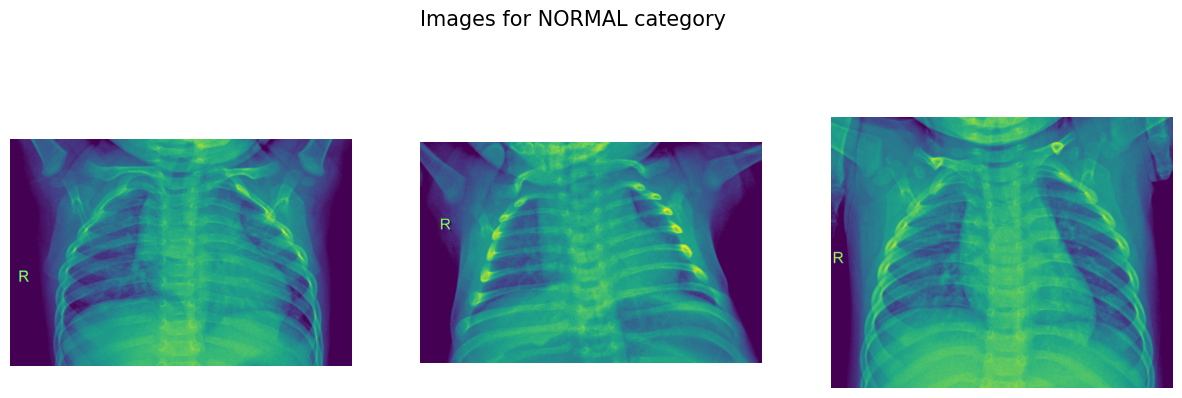

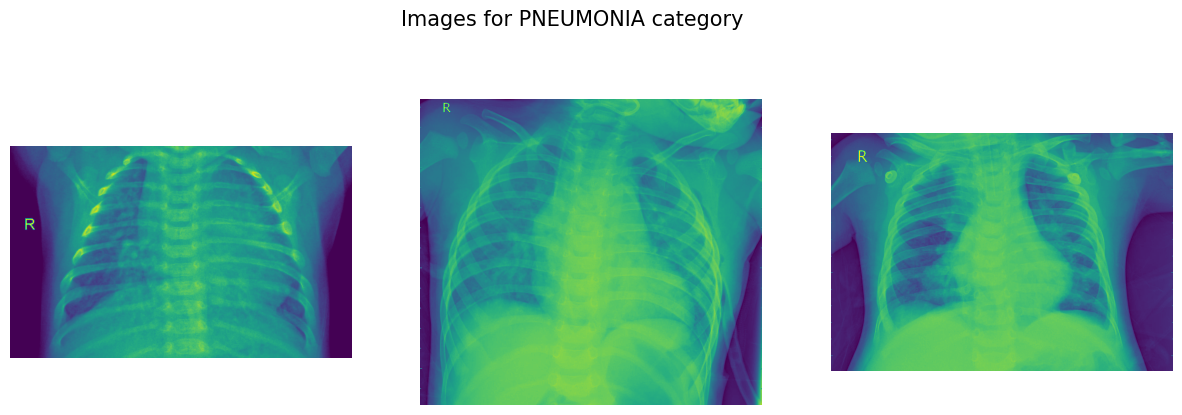

In [40]:
# Load data to view sample images
path = train_path
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=15)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

### 3.3.3. Visualize Class Distribution

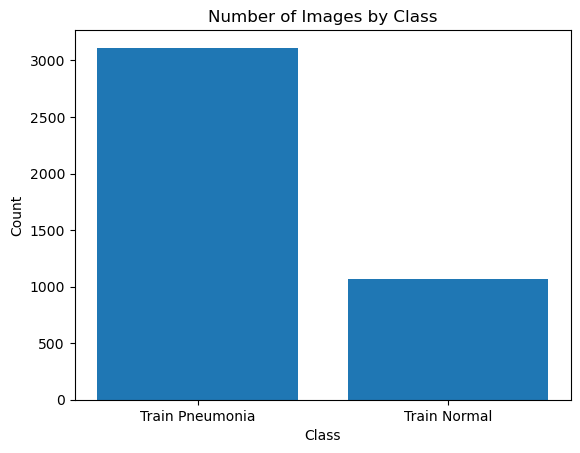

In [33]:
# Path to class pneumonia 
pneu_train_path = '/home/munyao/Desktop/deku/chest_data/train/PNEUMONIA'
# Path to class normal
norm_train_path = '/home/munyao/Desktop/deku/chest_data/train/NORMAL'

# Get the class distribution
number_classes = {'Train Pneumonia': len(os.listdir(pneu_train_path)),
                  'Train Normal': len(os.listdir(norm_train_path))}

plt.bar(number_classes.keys(), number_classes.values())
plt.title("Number of Images by Class")
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

# 4. DATA PREPARATION
Data preprocessing is an important step in building a machine learning model, especially when it comes to medical image classification tasks such as pneumonia classification for our case. The preprocessing steps can help improve the accuracy and generalizability of the model by cleaning and transforming the data to make it more suitable for training the model.


## 4.1. Data Augmentation 

The augmentation parameters provided are used to perform data augmentation on images, which is a common technique used in deep learning to increase the size of a dataset and improve model performance. The parameters include rescaling the image values to be between 0 and 1, rotating the image by up to 20 degrees, shifting the image horizontally and vertically by up to 20% of the image size, shearing the image by up to 20%, zooming into the image by up to 20%, flipping the image horizontally, and filling in any empty space with the nearest pixel value. These augmentations help to create more variability in the dataset, which can improve the model's ability to generalize to new data.

>Function that takes in the data path and the augmentation parameters you provided, performs data augmentation on the images in that path, and then displays a grid of four images: the original image and three randomly augmented images.


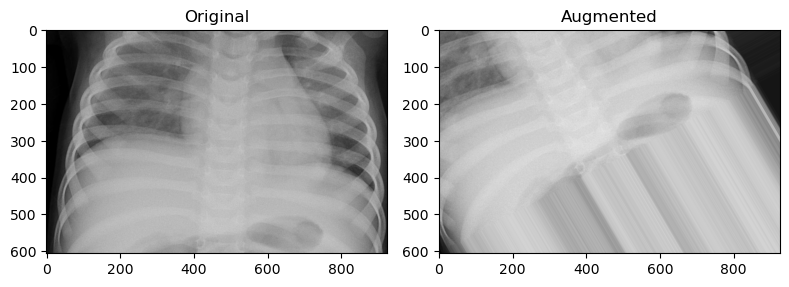

In [6]:
# Define function
def display_augmented_images(data, augmentation_params):
    # Define image generator with augmentation parameters
    datagen = ImageDataGenerator(**augmentation_params)

    # Apply augmentation to the data
    augmented_data = datagen.flow(data, batch_size=len(data), shuffle=False).next()

    # Normalize pixel values to the range [0, 1]
    data = data.astype('float32') / 255.0
    augmented_data = augmented_data.astype('float32') / 255.0

    # Display the original and augmented images in a grid
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(data[0])
    axs[0].set_title('Original')
    axs[1].imshow(augmented_data[0])
    axs[1].set_title('Augmented')

    plt.tight_layout()

    # Show images
    plt.show()

# Call Function
data = np.array([plt.imread(os.path.join(pneu_train_path, f)) for f in os.listdir(pneu_train_path)[:1]])
augmentation_params = {
    'rotation_range': 30,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'vertical_flip': True,
    'brightness_range': (0.8, 1.2)
}

display_augmented_images(data, augmentation_params)


## 4.2. Preprocess Data for Modelling

In [7]:
# Define the batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Define the paths to the training and validation directories
train_dir = train_path
val_dir = val_path
test_dir = test_path

# Create an ImageDataGenerator object for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest')

# Create an ImageDataGenerator object for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create a validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Create an ImageDataGenerator object for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 4177 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 5. MODELING
The training dataset had class imbalance issue. We will apply transfer learning to help overcome this problem by leveraging pre-trained model like VGG that have learned useful features from diverse datasets. VGG, in particular, is known for its ability to extract features from images, which can help improve the performance of your model even with a class-imbalanced dataset. By fine-tuning the pre-trained model with a few additional layers and training it on the pneumonia dataset, transfer learning can help improve the accuracy of the pneumonia classification mode

The model used is VGG16. It is a strong model for pneumonia classification due to its high performance, pre-trained nature, and availability of pre-trained weights. It can serve as a powerful tool for medical image analysis and can help to improve the accuracy and efficiency of your classification system. 

The VGG16 model is a good choice for pneumonia classification because it has already been pre-trained on a large and diverse dataset of natural images, which helps it learn useful features for image classification tasks. The addition of the extra layers fine-tunes the model for the specific task of pneumonia classification, while still leveraging the pre-trained feature.

### Visualize Convolution Layers

1/1 [==============================] - 1s 1s/step


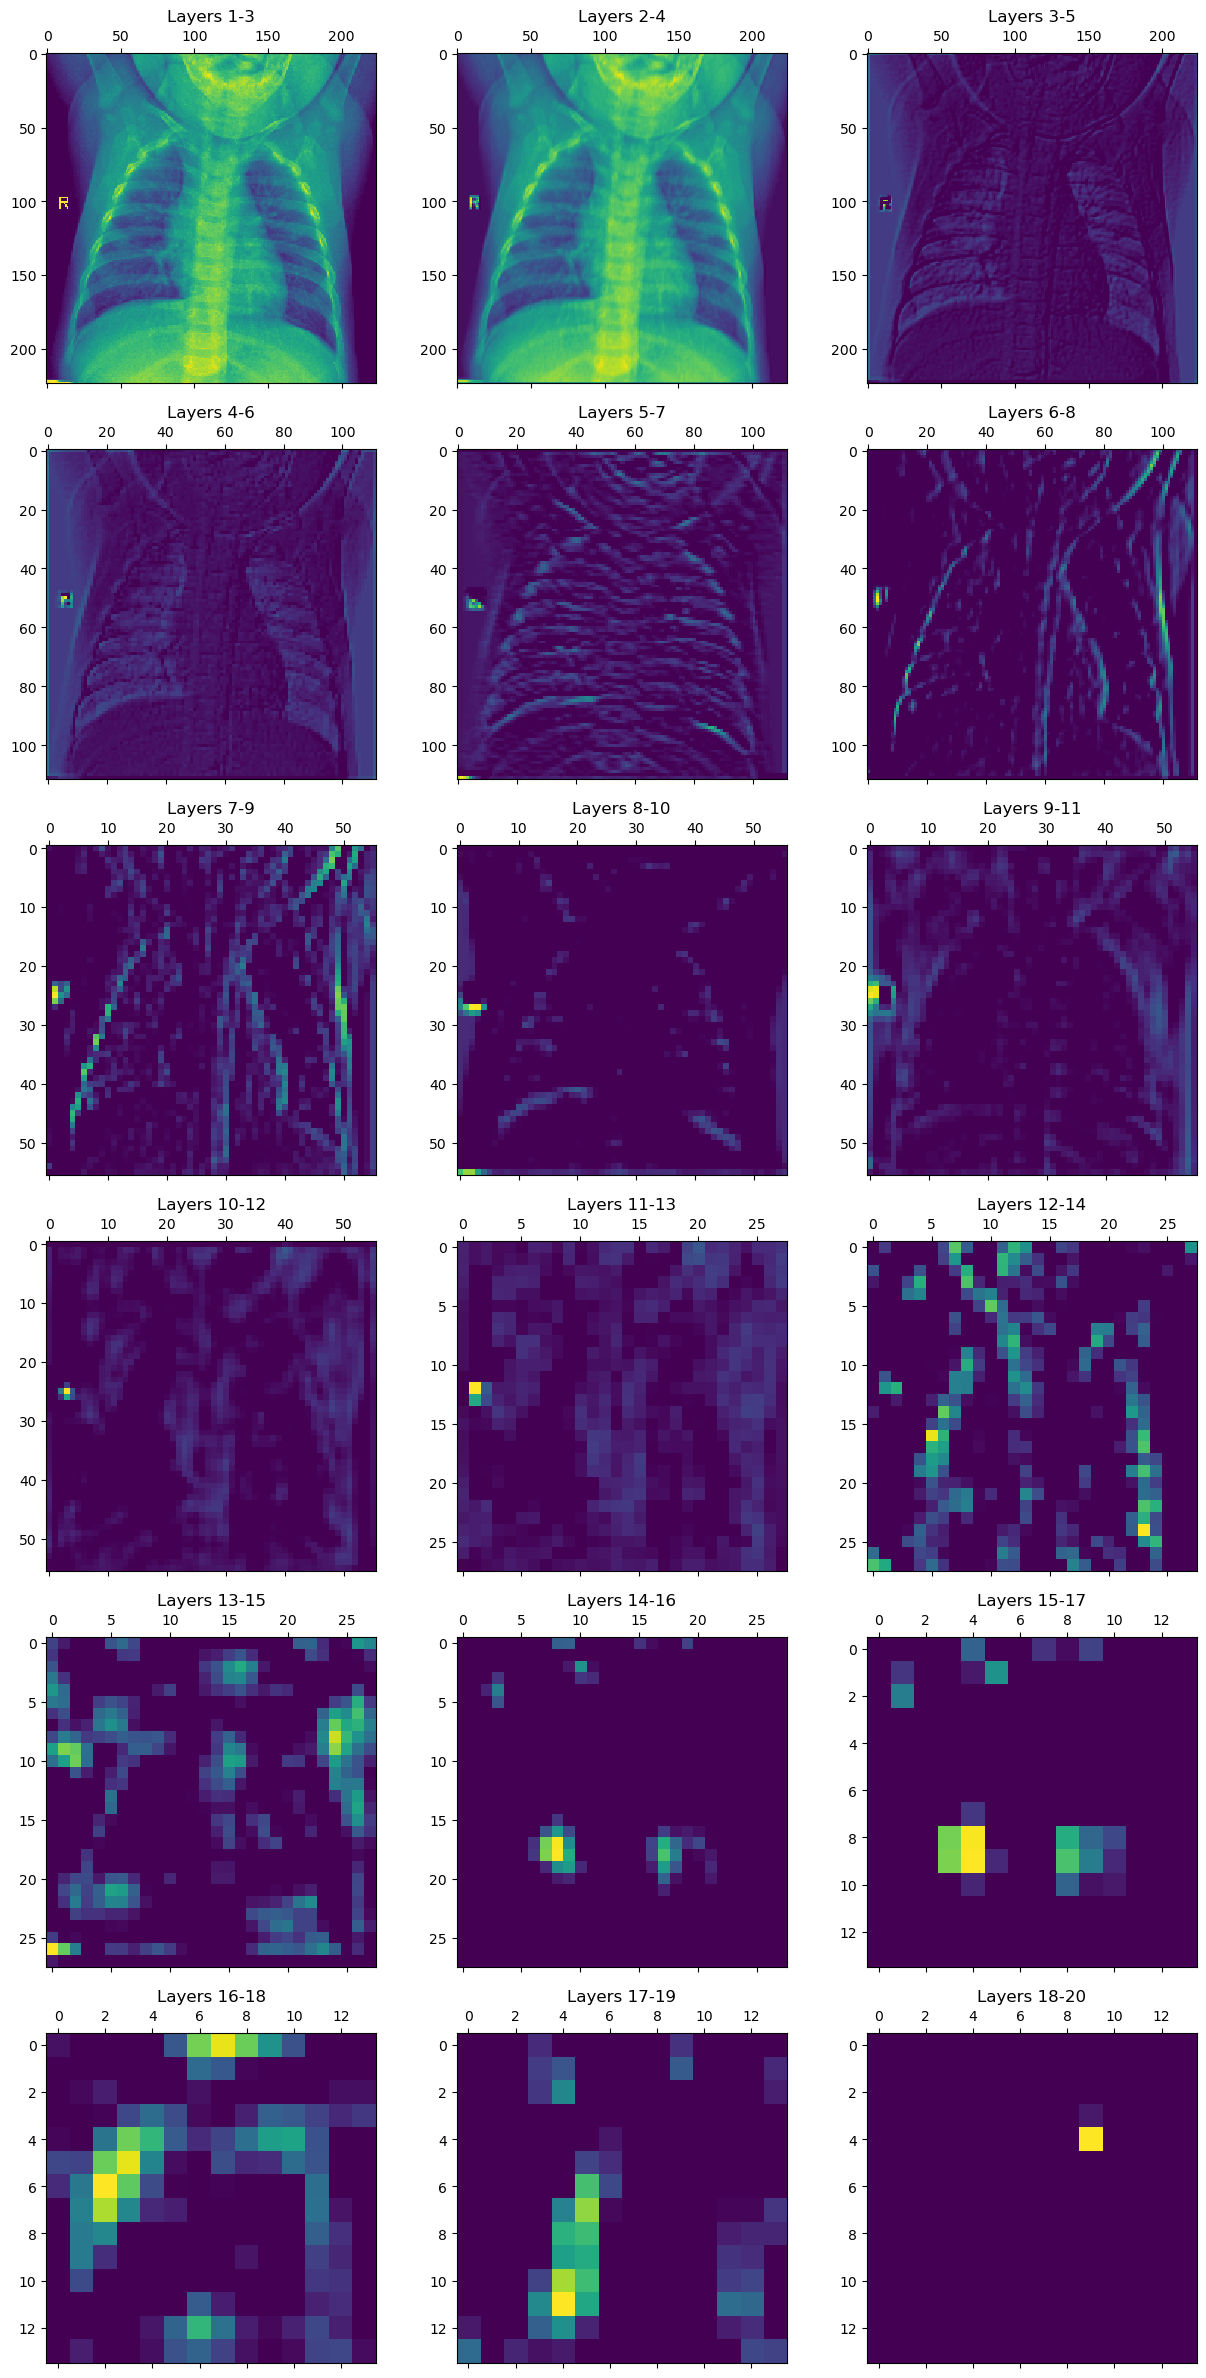

In [27]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Create a new model that outputs the output of each layer
layer_outputs = [layer.output for layer in base_model.layers[:18]]  # only use the first 18 layers
activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

def visualize_activations(img_path):
    # Get an example image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get the activations for each layer
    activations = activation_model.predict(x)

    # Visualize the activations for each layer
    fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,30))
    for i, activation in enumerate(activations):
        row = i // 3
        col = i % 3
        axs[row, col].matshow(activation[0, :, :, 1], cmap='viridis')  # visualize the 2nd channel
        axs[row, col].set_title(f'Layers {i+1}-{i+3}')

    # Show subplots    
    plt.show()

# Example usage
norm_img_path = '/home/munyao/Desktop/deku/chest_data/train/NORMAL/NORMAL-137300-0001.jpeg'
visualize_activations(norm_img_path)


2023-03-16 02:38:30.421583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 02:38:30.422527: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1/1 [==============================] - 1s 893ms/step


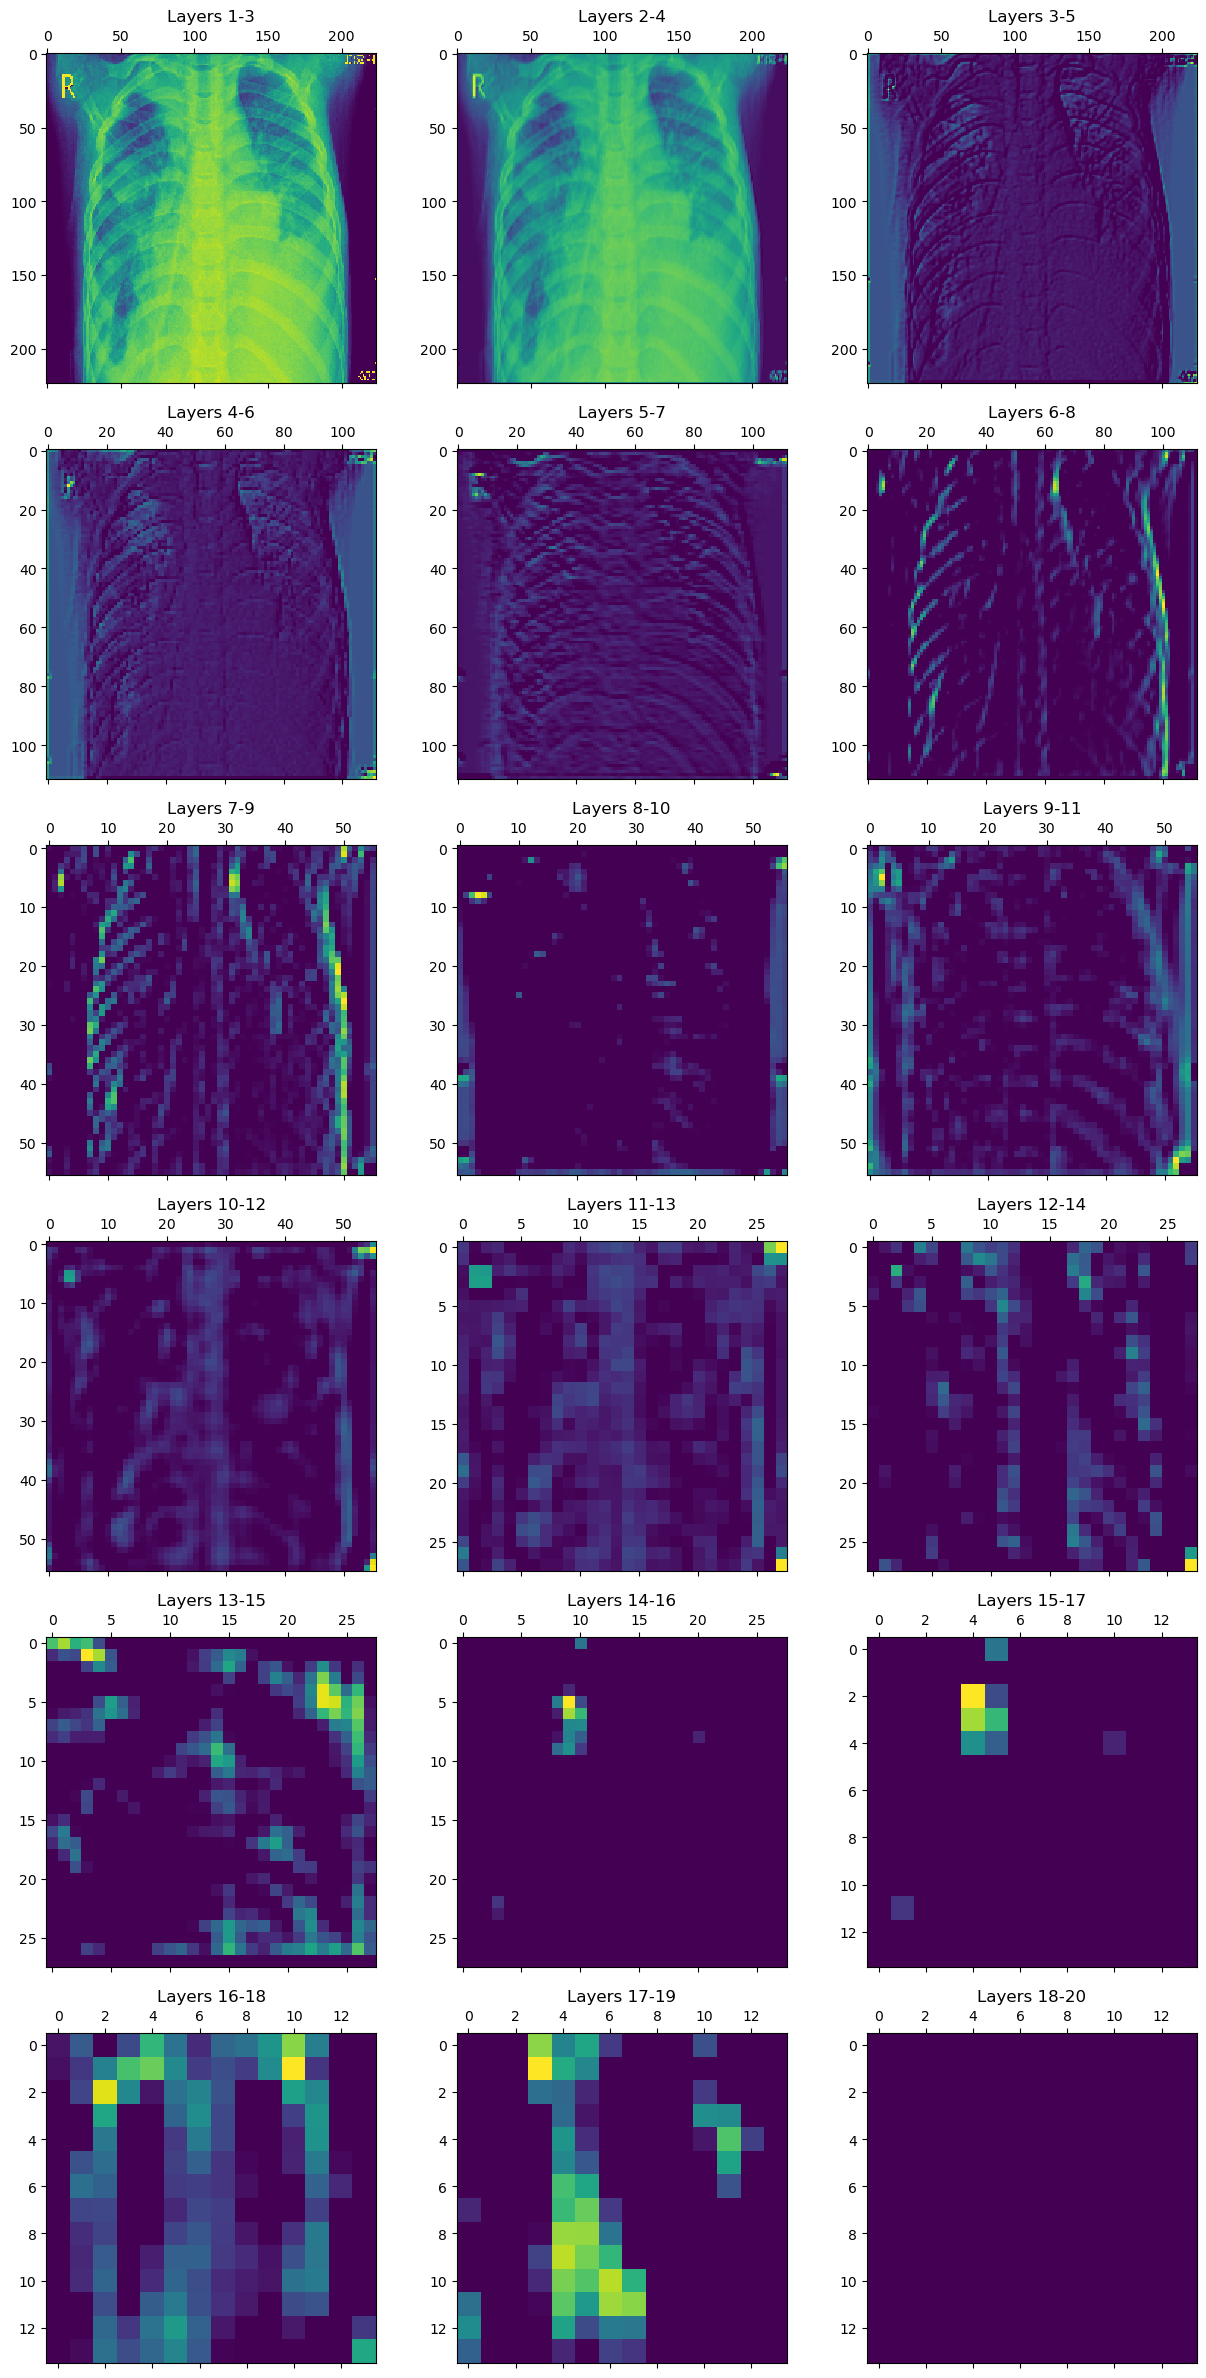

In [8]:
# Get an example image
pneu_img_path = 'chest_data/train/PNEUMONIA/BACTERIA-37006-0001.jpeg'
# Call function
visualize_activations(pneu_img_path)

## 5.1.  VGG16 Model Develpment
The VGG16 architecture is characterized by its deep convolutional layers, with 13 convolutional layers and 5 max-pooling layers. It also includes three fully connected layers at the end of the network. This architecture is known for its simplicity and effectiveness in image classification tasks.

The model has been fine-tuned for the specific task of pneumonia classification, by adding a few additional trainable layers on top of the pre-trained VGG16 model. These layers include a flatten layer, a dense layer with 256 units and ReLU activation, a dropout layer with a rate of 0.5, and a final dense layer with a sigmoid activation to output the binary classification prediction. 

The model is trained using binary cross-entropy loss and the Adam optimizer, and includes additional metrics to monitor its performance during training and evaluation.


### 5.1.1. Model Architecture

In [105]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new trainable layers
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])


### 5.1.2 Train Model on 80% 

In [89]:
# Specify the data directories
train_dir = train_path
val_dir = val_path
test_dir = test_path

# Set the batch size and image size
batch_size = 32
img_size = (224, 224)

# Create the image generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.8
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5
)

# Create the train, validation, and test sets
train_generator_25 = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator_25 = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
    
)

test_generator_25 = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 836 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [91]:
# Calculate class weights
class_weight = class_weight.compute_class_weight('balanced', np.unique(train_labels), train_labels)

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('deku.h5', monitor='val_recall', save_best_only=True, mode='max', verbose=1)

# Compile the model with appropriate loss function, optimizer and evaluation metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'recall', 'f1_score'])

# Train the model on the data
history = model.fit(train_generator_25, train_generator_25, epochs=10, batch_size=32, validation_data=(val_generator_25, val_generator_25), callbacks=[checkpoint], class_weight=class_weight)


Epoch 1/5
27/27 [==============================] - 1304s 48s/step - loss: 0.6637 - accuracy: 0.7117 - recall_3: 0.9133 - val_loss: 0.5928 - val_accuracy: 0.7372 - val_recall_3: 1.0000
Epoch 2/5
27/27 [==============================] - 1253s 46s/step - loss: 0.6038 - accuracy: 0.7452 - recall_3: 1.0000 - val_loss: 0.5759 - val_accuracy: 0.7372 - val_recall_3: 1.0000
Epoch 3/5
27/27 [==============================] - 1302s 48s/step - loss: 0.5721 - accuracy: 0.7452 - recall_3: 1.0000 - val_loss: 0.6419 - val_accuracy: 0.7372 - val_recall_3: 1.0000
Epoch 4/5
27/27 [==============================] - 1270s 47s/step - loss: 0.6004 - accuracy: 0.7452 - recall_3: 1.0000 - val_loss: 0.5917 - val_accuracy: 0.7372 - val_recall_3: 1.0000
Epoch 5/5
27/27 [==============================] - 1249s 46s/step - loss: 0.5904 - accuracy: 0.7452 - recall_3: 1.0000 - val_loss: 0.5875 - val_accuracy: 0.7372 - val_recall_3: 1.0000


>Based on the training results, the VGG16 model achieved an accuracy of approximately 74% on the validation set. However, it is important to note that the model was only trained on a portion of the full training data. This could potentially limit the performance of the model.

>Additionally, the recall score for the pneumonia class was consistently at 100%, which indicates that the model was able to correctly identify all instances of pneumonia in the validation set. 

>It is also worth noting that the loss values for the model were decreasing across epochs, which indicates that the model was learning and improving over time. However, the relatively high loss values suggest that there is still room for improvement and further tuning of the model may be necessary to improve its performance.

## 5.2. Model Tuning

We aim to develop a highly accurate model for a binary classification task on image data. To achieve this goal, we started with a pre-trained VGG16 model and added new trainable layers to it. We then experimented with different hyperparameters to find the best combination that produced the highest accuracy on the test data.

We handle the class imbalance in the dataset using class weights, which assigns more weight to the minority class to balance the contribution of each class during training.

The code also freezes the layers of the pre-trained VGG16 model to prevent overfitting and adds new trainable layers on top. Then, the top layers of the model are unfrozen and fine-tuned using a lower learning rate and the Adam optimizer.

The code also includes a checkpoint to save the best model during training based on the validation recall metric. Finally, the code saves the final model as a **"deku" model**.


In [106]:
# Set up the class weights for the imbalanced data
class_weight = {0: 1, 1: 3}

# Freeze the layers of the pre-trained VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate and Adam optimizer
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

# Unfreeze the top layers of the model for fine-tuning
for layer in model.layers[:-4]:
    layer.trainable = False
for layer in model.layers[-4:]:
    layer.trainable = True

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('deku.h5', monitor='val_recall', save_best_only=True, mode='max', verbose=1)

# Train the model
def f1_score(y_true, y_pred):
    """Calculate the F1 score."""
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score, Recall(), Precision()])

# Save the final model as a "deku" model
model.save('deku.h5')


NameError: name 'Model' is not defined

# 6. EVALUATION

* **Precision:** the proportion of true positive predictions out of all positive predictions. 
* **Recall:** the proportion of true positive predictions out of all actual positive cases. 
* **F1-score:** the harmonic mean of precision and recall.

## 6.1. Load deku Model

In [ ]:
# Load the saved "deku" model
deku_model = tf.keras.models.load_model('deku.h5')


## 6.2. Prediction on Test

In [ ]:
# Use the model to predict the labels of the test data
y_pred = deku_model.predict(test_data)

# Convert the predictions to binary values using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype('int32')


## 6.3. Confusion Matrix

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d')


## 6.4. Learning Curves

In [94]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

* Model Accuarcy

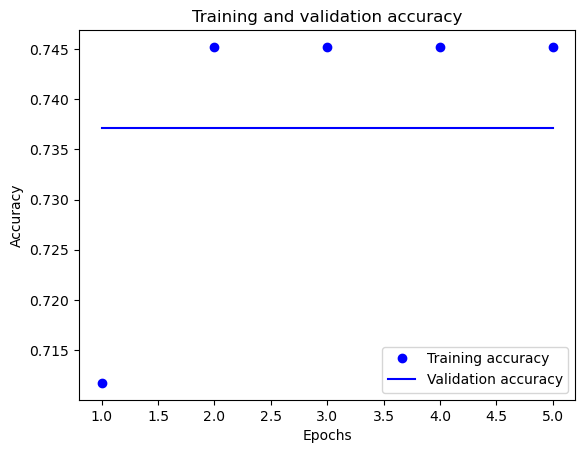

In [95]:
# Plot the training and validation accuracy
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

* Model Loss

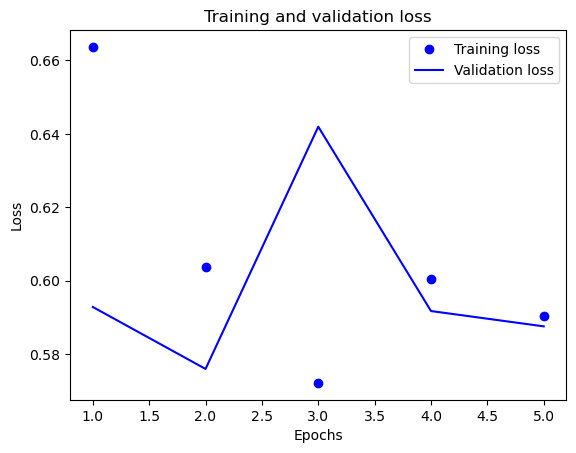

In [98]:
# Plot the training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* Model Recall

In [100]:
# Recall Pot
plt.plot(history.history['recall'], label='Training recall')
plt.plot(history.history['val_recall'], label='Validation recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


* F1 Score

In [101]:
# F1 score plot
plt.plot(history.history['f1_score'], label='Training F1 score')
plt.plot(history.history['val_f1_score'], label='Validation F1 score')
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# 7. RECOMENDATIONS

# DEPLOYMENT